## Chronic kidney disease dataset
This project seeks to analyze the chronic kideny disease data set and come up with insights such as:
. as to whether attributes such as:
    1. hypertension
    2. cornorary artery disease
    3. diabetes mellitus
    4. anemia
    5. blood count
    6. minerals
have a strong correlation to chronic kidney disease
. as to whether the following algorithms:
    1. KNN
    2. Decision tree(J48)
    3. Neural network(MLP)
    perform better or worse after conversion of some of the numeric attributes to nominal

## Steps to complete assignment
1. Envision the end-to-end scikit-learn workflow
2. Get the chronic kidney dataset ready
3. Experiment on the data using the three algorithms
4. Fit the algorithms and use them to make predictions on the data
5. Evaluate the models/algorithms
6. Save the models and load pretrained models

## 2. Getting the dataset ready
Three main things we have to do
1. Split the data into features and labels (usually `X` and `y`)
2. Filling/imputing missing values or disregard them entirely
3. Feature encoding (converting nominal features into numeric features)


In [1]:
# create the dataframe
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff

#rurn off warnings
import warnings
warnings.filterwarnings("default")

# create header for dataset
header = ['age','bp','sg','al','su','rbc','pc','pcc',
    'ba','bgr','bu','sc','sod','pot','hemo','pcv',
    'wbcc','rbcc','htn','dm','cad','appet','pe','ane',
    'classification']

# kidney_disease = pd.io.parsers.read_csv("data/csv_result-chronic_kidney_disease_full.csv", error_bad_lines=False)
df = pd.read_csv("data/chronic_kidney_disease.arff",
        header=None,
        names=header
       )
kidney_disease=df
df.head()



,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,@relation Chronic_Kidney_Disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@attribute 'age' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@attribute 'bp' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@attribute 'sg' {1.005,1.010,1.015,1.020,1.025},NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@attribute 'al' {0,1,2,3,4,5},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check for missing values
There are some missing values. We could take several approaches to missing values:
1. Fill them with some value(imputation)
2. Removing the samples with missing values altogether

In [2]:
#Check for missing values
df.isna().sum()

age                0
bp                13
sg                24
al                24
su                24
rbc               25
pc                27
pcc               27
ba                27
bgr               27
bu                27
sc                27
sod               27
pot               27
hemo              27
pcv               27
wbcc              27
rbcc              27
htn               27
dm                28
cad               27
appet             27
pe                27
ane               27
classification    27
dtype: int64

In [3]:
# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)
# drop the NaN
df = df.dropna(axis=0, how="any")
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
30,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
36,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
38,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
41,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
47,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [4]:
#confirm all missing values have been removed
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wbcc              0
rbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [5]:
# print total samples
print("Total samples:", len(df))

Total samples: 157


In [6]:
# print 4-rows and 25-columns
print("Partial data\n", df.iloc[0:4, 0:25])

Partial data
    age  bp     sg al su       rbc        pc      pcc          ba  bgr  ...  \
30  48  70  1.005  4  0    normal  abnormal  present  notpresent  117  ...   
36  53  90  1.020  2  0  abnormal  abnormal  present  notpresent   70  ...   
38  63  70  1.010  3  0  abnormal  abnormal  present  notpresent  380  ...   
41  68  80  1.010  3  2    normal  abnormal  present     present  157  ...   

   pcv   wbcc rbcc  htn   dm  cad appet   pe  ane classification  
30  32   6700  3.9  yes   no   no  poor  yes  yes            ckd  
36  29  12100  3.7  yes  yes   no  poor   no  yes            ckd  
38  32   4500  3.8  yes  yes   no  poor  yes   no            ckd  
41  16  11000  2.6  yes  yes  yes  poor  yes   no            ckd  

[4 rows x 25 columns]


In [7]:
# Create X(data/feature variables)
X = df.drop("classification", axis=1)
global_X=X

# Create Y(labels)
y = df["classification"]
global_y=y
X, y

(    age  bp     sg al su       rbc        pc         pcc          ba  bgr  \
 30   48  70  1.005  4  0    normal  abnormal     present  notpresent  117   
 36   53  90  1.020  2  0  abnormal  abnormal     present  notpresent   70   
 38   63  70  1.010  3  0  abnormal  abnormal     present  notpresent  380   
 41   68  80  1.010  3  2    normal  abnormal     present     present  157   
 47   61  80  1.015  2  0  abnormal  abnormal  notpresent  notpresent  173   
 ..   ..  ..    ... .. ..       ...       ...         ...         ...  ...   
 422  55  80  1.020  0  0    normal    normal  notpresent  notpresent  140   
 423  42  70  1.025  0  0    normal    normal  notpresent  notpresent   75   
 424  12  80  1.020  0  0    normal    normal  notpresent  notpresent  100   
 425  17  60  1.025  0  0    normal    normal  notpresent  notpresent  114   
 426  58  80  1.025  0  0    normal    normal  notpresent  notpresent  131   
 
      ...  hemo pcv   wbcc rbcc  htn   dm  cad appet   pe  ane

## 3. Choosing the right algorithm and hyperparameters


# Neural network

# KNN

In [45]:
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
                kernel_initializer=k.initializers.random_normal(seed=13),
                activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

NameError: name 'Sequential' is not defined

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_20 = KNeighborsClassifier(n_neighbors=20)
neigh_30 = KNeighborsClassifier(n_neighbors=30)
neigh_40 = KNeighborsClassifier(n_neighbors=40)

C:\Users\charl\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\charl\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\charl\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# decision tree

In [9]:
## choose the right model and classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.get_params()
# clf = clf.fit(X,y)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

## PCA analysis
The objective here is to perform dimensionality reduction using PCA. For PCA, the features should be "numerics" only, therefore we need to remove the "categorical" features from the dataset.

In [10]:
# list of categorical features
categorical_ = ['sg','al','rbc', 'pc', 'pcc', 'ba', 'htn',
        'dm', 'cad', 'appet', 'pe', 'ane'
        ]
# drop the "categorical" features
# drop the classification column
df = df.drop(labels=['classification'], axis=1)

# clf.fit(X_train, y_train)
# drop using 'inplace' which is equivalent to df = df.drop()
df.drop(labels=categorical_, axis=1, inplace=True)
print("Partial data\n", df.iloc[0:4, 0:13]) # print partial data

Partial data
    age  bp su  bgr   bu   sc  sod  pot  hemo pcv   wbcc rbcc
30  48  70  0  117   56  3.8  111  2.5  11.2  32   6700  3.9
36  53  90  0   70  107  7.2  114  3.7   9.5  29  12100  3.7
38  63  70  0  380   60  2.7  131  4.2  10.8  32   4500  3.8
41  68  80  2  157   90  4.1  130  6.4   5.6  16  11000  2.6


In [11]:
## fit the model to training data
from sklearn.model_selection import train_test_split

normX = df

X_train, X_test, y_train, y_test = train_test_split(normX, y, test_size=0.2, shuffle=True)
print("X_Training data\n", X_train.head())
print("X_Test data\n", X_test.head())
print("y_Training data\n", y_train.head())
print("y_Test data\n",  y_test.head())


X_Training data
     age   bp su  bgr   bu   sc  sod  pot  hemo pcv    wbcc rbcc
289  55   80  0  118   18  0.9  135  3.6  15.5  43    7200  5.4
155  52   90  3  224  166  5.6  133   47   8.1  23    5000  2.9
381  32   60  0  102   17  0.4  147  4.7  14.6  41    6800  5.1
293  55   80  0  133   17  1.2  135  4.8  13.2  41    6800  5.3
160  70  100  0  118  125  5.3  136  4.9  12.0  37  \t8400  8.0
X_Test data
     age  bp su  bgr  bu   sc  sod  pot  hemo pcv   wbcc rbcc
412  63  70  0  113  25  0.6  146  4.9  16.5  52   8000  5.1
362  60  60  0  134  45  0.5  139  4.8  14.2  48  10700  5.6
311  33  80  0  100  37  1.2  142  4.0  16.9  52   6700  6.0
417  52  80  0   99  25  0.8  135  3.7  15.0  52   6300  5.3
287  30  80  0  131  38  1.0  147  3.8  14.1  45   9400  5.3
y_Training data
 289    notckd
155       ckd
381    notckd
293    notckd
160       ckd
Name: classification, dtype: object
y_Test data
 412    notckd
362    notckd
311    notckd
417    notckd
287    notckd
Name: classifi

## Decision tree fitting

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [13]:
y_preds = clf.predict(X_test)
y_preds

array(['notckd', 'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'notckd', 'notckd', 'notckd', 'notckd', 'notckd',
       'notckd', 'notckd', 'ckd', 'notckd'], dtype=object)

## KNN fitting

In [14]:
neigh_3.fit(X_train, y_train)
neigh_20.fit(X_train, y_train)
neigh_30.fit(X_train, y_train)
neigh_40.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [15]:
print("KNN with 3 neighbours",neigh_3.predict(X_test))
KNN_preds = neigh_3.predict(X_test)

KNN with 3 neighbours ['notckd' 'notckd' 'notckd' 'notckd' 'notckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd' 'notckd'
 'notckd' 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'notckd'
 'notckd' 'notckd' 'notckd' 'notckd' 'notckd' 'notckd' 'ckd' 'notckd']


In [16]:
y_test

412    notckd
362    notckd
311    notckd
417    notckd
287    notckd
30        ckd
281    notckd
118       ckd
422    notckd
418    notckd
225       ckd
75        ckd
407    notckd
279    notckd
394    notckd
409    notckd
411    notckd
419    notckd
393    notckd
184       ckd
117       ckd
337    notckd
98        ckd
288    notckd
277    notckd
401    notckd
332    notckd
379    notckd
338    notckd
425    notckd
252       ckd
328    notckd
Name: classification, dtype: object

## 4. Evaluate the models
How well the model we've just trained on training has learned and evaluate that perfomance on previously unseen data

## Decision tree

In [17]:
# Evaluate the model on training and test data
clf.score(X_train, y_train)#a score of 1 indicates 100%

1.0

In [18]:
# evaluate perfomance on test data
clf.score(X_test, y_test)#96.87% accuracy is still good for test accuracy

0.9375

## KNN

In [19]:
neigh_3.score(X_train, y_train)

0.872

In [20]:
neigh_3.score(X_test, y_test)

0.9375

In [21]:
neigh_20.score(X_train, y_train)

0.784

In [22]:
neigh_20.score(X_test, y_test)

0.875

In [23]:
neigh_30.score(X_train, y_train)

0.784

In [24]:
neigh_30.score(X_test, y_test)

0.84375

In [25]:
neigh_40.score(X_train, y_train)

0.72

In [26]:
neigh_40.score(X_test, y_test)

0.75

## Other metrics for evaluating the perfomance of our model except for accuracy

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#compare test labels to prediction labels of the decision tree algorithm
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         ckd       1.00      0.75      0.86         8
      notckd       0.92      1.00      0.96        24

    accuracy                           0.94        32
   macro avg       0.96      0.88      0.91        32
weighted avg       0.94      0.94      0.93        32



In [28]:
#compare test labels to prediction labels of the KNN algorithm
print(classification_report(y_test, KNN_preds))

              precision    recall  f1-score   support

         ckd       1.00      0.75      0.86         8
      notckd       0.92      1.00      0.96        24

    accuracy                           0.94        32
   macro avg       0.96      0.88      0.91        32
weighted avg       0.94      0.94      0.93        32



# confusion matrix

In [29]:
#Decision tree algorithm
confusion_matrix(y_test, y_preds)

array([[ 6,  2],
       [ 0, 24]], dtype=int64)

In [30]:
#KNN algorithm
confusion_matrix(y_test, KNN_preds)

array([[ 6,  2],
       [ 0, 24]], dtype=int64)

# accuracy score

In [31]:
#Decision tree
print(clf.__class__.__name__, accuracy_score(y_test, y_preds))
print(f'Classification Report for {clf.__class__.__name__}')
print(classification_report(y_test, y_preds))
print('*'*60)
print(f"the model is {accuracy_score(y_test, y_preds)*100:.2f}% accurate")

DecisionTreeClassifier 0.9375
Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

         ckd       1.00      0.75      0.86         8
      notckd       0.92      1.00      0.96        24

    accuracy                           0.94        32
   macro avg       0.96      0.88      0.91        32
weighted avg       0.94      0.94      0.93        32

************************************************************
the model is 93.75% accurate


In [32]:
# KNN
print(neigh_3.__class__.__name__, accuracy_score(y_test, KNN_preds))
print(f'Classification Report for {neigh_3.__class__.__name__}')
print(classification_report(y_test, KNN_preds))
print('*'*60)
print(f"the model is {accuracy_score(y_test, KNN_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.9375
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

         ckd       1.00      0.75      0.86         8
      notckd       0.92      1.00      0.96        24

    accuracy                           0.94        32
   macro avg       0.96      0.88      0.91        32
weighted avg       0.94      0.94      0.93        32

************************************************************
the model is 93.75% accurate


## Saving targets with different color names
For plotting purposes, it is recommended to save the targets of a classification process with some color name

In [33]:
targets = y.astype('category')
# save target-values as color for plotting
# red: disease,  green: no disease
label_color = ['red' if i=='ckd' else 'green' for i in targets]
print(label_color[0:3], label_color[-3:-1])

['red', 'red', 'red'] ['green', 'green']


In [34]:
# # Create X(data/feature variables)
# X = df

# # Create Y(labels)
# y = df["classification"]
# X, y

## converting the dropped categorical features to numerical features
We initially dropped several categorical features as they cannot be used by PCA. However we did not have to do this as converting them to numeric features could have also done the trick. We use one-hot-encoding

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['sg','al','rbc', 'pc', 'pcc', 'ba', 'htn',
        'dm', 'cad', 'appet', 'pe', 'ane'
        ]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(global_X)
pd.DataFrame(transformed_X)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1,0,0,0,0,0,0,0,0,1,...,0,117,56,3.8,111,2.5,11.2,32,6700,3.9
1,0,0,0,1,0,0,0,1,0,0,...,0,70,107,7.2,114,3.7,9.5,29,12100,3.7
2,0,1,0,0,0,0,0,0,1,0,...,0,380,60,2.7,131,4.2,10.8,32,4500,3.8
3,0,1,0,0,0,0,0,0,1,0,...,2,157,90,4.1,130,6.4,5.6,16,11000,2.6
4,0,0,1,0,0,0,0,1,0,0,...,0,173,148,3.9,135,5.2,7.7,24,9200,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0,0,0,1,0,1,0,0,0,0,...,0,140,49,0.5,150,4.9,15.7,47,6700,4.9
153,0,0,0,0,1,1,0,0,0,0,...,0,75,31,1.2,141,3.5,16.5,54,7800,6.2
154,0,0,0,1,0,1,0,0,0,0,...,0,100,26,0.6,137,4.4,15.8,49,6600,5.4
155,0,0,0,0,1,1,0,0,0,0,...,0,114,50,1.0,135,4.9,14.2,51,7200,5.9


In [36]:
# # convert categorical features into dummy variable
features = pd.get_dummies(kidney_disease, columns=categorical_features)
features

,age,bp,su,bgr,bu,sc,sod,pot,hemo,pcv,...,appet_good,appet_no,appet_poor,pe_?,pe_good,pe_no,pe_yes,ane_?,ane_no,ane_yes
0,@relation Chronic_Kidney_Disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,@attribute 'age' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,@attribute 'bp' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,@attribute 'sg' {1.005,1.010,1.025},NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,@attribute 'al' {0,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,55,80,0,140,49,0.5,150,4.9,15.7,47,...,1,0,0,0,0,1,0,0,1,0
423,42,70,0,75,31,1.2,141,3.5,16.5,54,...,1,0,0,0,0,1,0,0,1,0
424,12,80,0,100,26,0.6,137,4.4,15.8,49,...,1,0,0,0,0,1,0,0,1,0
425,17,60,0,114,50,1.0,135,4.9,14.2,51,...,1,0,0,0,0,1,0,0,1,0


In [37]:
#refitting the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, shuffle=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96875

The accuracy is 96.88%. This is equivalent to what we obtained using the PCA analysis method which used a combination of both imputation as well as dropping cells with nominal values.

## Visualize the data


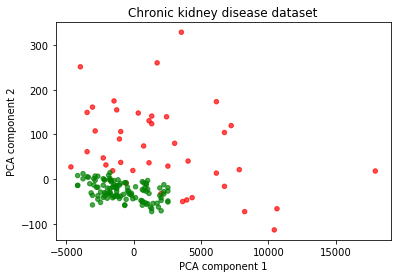

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(normX)
T = pca.transform(normX) # transformed data
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
T = pd.DataFrame(T)
# plot the data
T.columns = ['PCA component 1', 'PCA component 2']
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="Chronic kidney disease dataset" )
plt.show()

## 5. improve the model

We are going to use feature scaling to improve the data. In other words, making sure all of your numerical data is on the same scale. There are two ways to do this:
1. Normalization(min-max scaling)- rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. 
2. Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation).

## Normalize the data
The high variance observed in the data merits the use of normalization. This will involve setting the mean=0 and variance=1

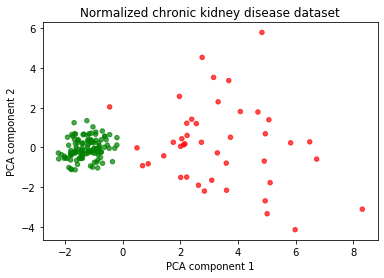

In [39]:
from sklearn import preprocessing
# StandardScaler: mean=0, variance=1
df = preprocessing.StandardScaler().fit_transform(normX)

#visualize data after normalization
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df) # transformed data
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
T = pd.DataFrame(T)
# plot the data
T.columns = ['PCA component 1', 'PCA component 2']
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="Normalized chronic kidney disease dataset" )
plt.show()

In [40]:
# convert categorical features into dummy variable

# df = pd.get_dummies(df, columns=categorical_)


# Try different number of estimators

In [41]:
from sklearn.ensemble import BaggingClassifier
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying the Decision Tree model with {i} estimators...")
    bag_clf = BaggingClassifier(tree.DecisionTreeClassifier(random_state=42), 
                            n_estimators=i,
                            bootstrap=True, n_jobs=-1)
    bag_clf.fit(X_train, y_train)
    print(f"Model accuracy on test set: {bag_clf.score(X_test, y_test) * 100:.2f}%")
    

C:\Users\charl\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Trying the Decision Tree model with 10 estimators...
Model accuracy on test set: 100.00%
Trying the Decision Tree model with 20 estimators...
Model accuracy on test set: 100.00%
Trying the Decision Tree model with 30 estimators...
Model accuracy on test set: 100.00%
Trying the Decision Tree model with 40 estimators...
Model accuracy on test set: 100.00%
Trying the Decision Tree model with 50 estimators...
Model accuracy on test set: 100.00%
Trying the Decision Tree model with 60 estimators...
Model accuracy on test set: 100.00%
Trying the Decision Tree model with 70 estimators...
Model accuracy on test set: 100.00%
Trying the Decision Tree model with 80 estimators...
Model accuracy on test set: 100.00%
Trying the Decision Tree model with 90 estimators...
Model accuracy on test set: 100.00%


## 6. Save and load models

In [42]:
import pickle

pickle.dump(clf, open("chronic_kidney_decision_tree.pkl", "wb"))


C:\Users\charl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='chronic_kidney_decision_tree.pkl'>
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
#how to load the decision tree model
Dec_tree_model = pickle.load(open("chronic_kidney_decision_tree.pkl", "rb"))
# Dec_tree_model.score(X_test, y_test)

C:\Users\charl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='chronic_kidney_decision_tree.pkl'>
  
